In [87]:
import pandas as pd
import numpy as np
#import scipy
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import cdist
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pylab as pl

In [88]:
# Load the data
from sklearn.datasets import load_iris
iris = load_iris()
iris_data = iris.data
from sklearn import datasets
#dir(datasets)

In [89]:
iris_target  = iris.target
print (set(iris_target))
X = iris.data  
y = iris.target

{0, 1, 2}


In [ ]:
iris_target

In [90]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123) 

In [91]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test) )

## calling kmeans algorithm


In [ ]:
iris_kmeans = KMeans(n_clusters=3, max_iter=500, verbose=1, n_init = 5) # initialization

In [94]:
iris_kmeans.fit(X_train)

Initialization complete
Iteration 0, inertia 171.4750542767974
Iteration 1, inertia 122.83328283213301
Iteration 2, inertia 119.9494239584921
Iteration 3, inertia 118.17355903510338
Iteration 4, inertia 117.39529135644548
Iteration 5, inertia 115.48801745573222
Iteration 6, inertia 115.40488980554007
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 232.280509958846
Iteration 1, inertia 124.19658518268528
Iteration 2, inertia 118.74729796043084
Iteration 3, inertia 116.91122884267497
Iteration 4, inertia 115.96799293729859
Iteration 5, inertia 115.31265634024341
Iteration 6, inertia 114.92805662528633
Iteration 7, inertia 114.86493571159069
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 184.7324550997456
Iteration 1, inertia 122.40444552045871
Iteration 2, inertia 116.06459805245393
Iteration 3, inertia 115.06822219811598
Iteration 4, inertia 114.86493571159069
Converged at iteration 4: strict converge

KMeans(max_iter=500, n_clusters=3, n_init=5, verbose=1)

In [95]:
clusters1 = iris_kmeans.predict(X_test)
print(clusters1)

[1 2 2 1 0 1 1 0 0 1 2 0 1 2 2 2 0 0 1 0 0 1 0 2 0 0 0 1 2 0]


In [93]:
print(iris_kmeans.labels_)

[0 2 1 1 2 2 0 1 1 2 2 1 0 0 2 2 0 2 1 1 0 1 1 0 2 2 2 2 0 0 1 0 2 1 1 0 2
 0 0 1 0 2 2 1 0 0 0 1 0 2 1 1 2 2 0 1 1 2 1 0 0 1 0 1 1 0 1 1 0 0 0 2 2 1
 1 0 2 1 1 2 0 2 0 0 2 2 0 1 1 2 0 0 0 0 1 2 1 2 2 1 2 0 2 0 0 1 2 1 0 2 2
 2 2 2 2 1 2 2 2 0]


The centroids provide an aggregate representation and a characterization of each cluster

In [96]:
print(iris_kmeans.cluster_centers_)

[[-1.05366838  0.89273205 -1.36688869 -1.30676516]
 [-0.12566288 -0.8777322   0.29048007  0.23817887]
 [ 1.10973085  0.11778497  0.95210597  0.95271549]]


**Since we know what the classes are, we can evaluate clustering performance by using metrics that compare clusters to the actual classes:
Homogeneity: each cluster contains only members of a single class. Completeness: all members of a given class are assigned to the same cluster**

In [ ]:
from sklearn.metrics import completeness_score, homogeneity_score

In [97]:
print(completeness_score(iris_target,clusters))

1.0


In [ ]:
print(homogeneity_score(iris_target,clusters))

**The completeness score approaches 1 when most of the data points that are members of a given class are elements of the same cluster while the homogeneity score approaches 1 when all the clusters contain almost only data points that are member of a single class.**

**Elbow rule to determine the number of k** 

In [ ]:
#from scipy import cluster
#cluster_array = [cluster.vq.kmeans(iris_data,2)]
#cluster_array

In [98]:
k_range = range(1,10)
distortions1 = []
distortions = []
for i in k_range:
    kmeanModel = KMeans(n_clusters = i)
    kmeanModel.fit(iris_data)
    distortions.append(kmeanModel.inertia_)
    # using distnace between cluster center and each data point
    distortions1.append(sum(np.min(cdist(iris_data, kmeanModel.cluster_centers_, 'euclidean'), axis =1))/iris_data.shape[0])

#fig1 = plt.figure()
#ex = fig1.add_subplot(111)
#ex.plot(k_range, distortions, 'b*-')
#plt.xlabel("Number of clusters")
#plt.ylabel("Average Distrotion")
#plt.title("Selecting k with the Elbow Method using inertia")
    
 

Text(0.5, 1.0, 'Selecting k with the Elbow Method using distance')

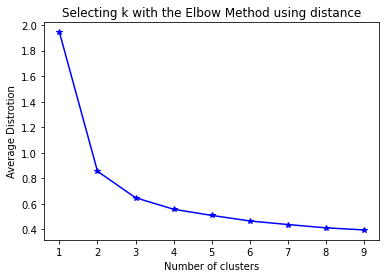

In [99]:
fig1 = plt.figure()
ex = fig1.add_subplot(111)
ex.plot(k_range, distortions1, 'b*-')
plt.xlabel("Number of clusters")
plt.ylabel("Average Distrotion")
plt.title("Selecting k with the Elbow Method using distance")

**Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].**

**Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.**

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
k_range = range(2,10)
for i in k_range:
    clusterer = KMeans(n_clusters=i, random_state=10)
    cluster_labels = clusterer.fit_predict(iris_data)
    silhouette_avg = silhouette_score(iris_data, cluster_labels)
    print("For n_clusters =", i,
          "The average silhouette_score is :", silhouette_avg)
    #print(cluster_labels)

Take another example on a wholesale customer segmentation problem. The data is hosted on the UCI Machine Learning repository.

**The aim of this problem is to segment the clients of a wholesale distributor based on their annual spending on diverse product categories, like milk, grocery, region, etc.** 

Let us read the data

In [100]:
# reading the data and looking at the first five rows of the data
data=pd.read_csv("Wholesale customers data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


We have the spending details of customers on different products like Milk, Grocery, Frozen, Detergents, etc. Now, we have to segment the customers based on the provided details. Before doing that, let’s pull out some statistics related to the data:

In [101]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Here, we see that there is a lot of variation in the magnitude of the data. Variables like Channel and Region have low magnitude whereas variables like Fresh, Milk, Grocery, etc. have a higher magnitude.

Since K-Means is a distance-based algorithm, this difference of magnitude can create a problem. So let’s first bring all the variables to the same magnitude:

In [102]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-2.452584e-16,-5.737834e-16,-2.422305e-17,-1.589638e-17,-6.030530e-17,1.135455e-17,-1.917658e-17,-8.276208e-17
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-7.787951e-01,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-5.783063e-01,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-2.942580e-01,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,1.890921e-01,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650e+00,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


The magnitude looks similar now. Next, let’s create a kmeans function and fit it on the data:

In [103]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(n_clusters=2)

We have initialized two clusters and pay attention – the initialization is not random here. We have used the k-means++ initialization which generally produces better results as we have discussed in the previous section as well.

Let’s evaluate how well the formed clusters are. To do that, we will calculate the inertia of the clusters:

In [ ]:
# inertia on the fitted data
kmeans.inertia_

Text(0, 0.5, 'Inertia')

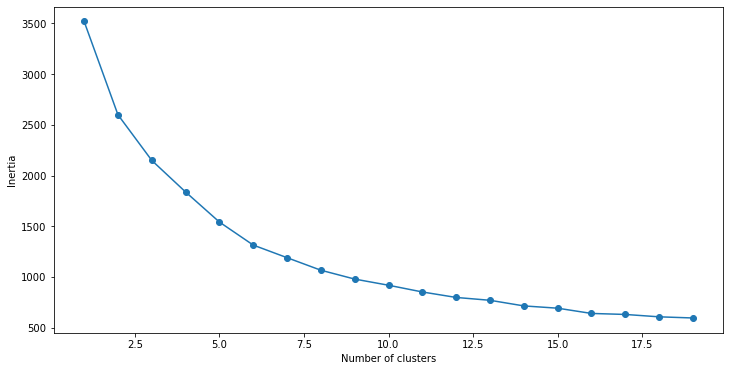

In [104]:
## Elbow rule 

# fitting multiple k-means algorithms and storing the values 
# in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans( n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

Looking at the above elbow curve, we can choose any number of clusters between 5 to 8. Let’s set the number of clusters as 6 and fit the model:

In [105]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans( n_clusters = 5, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [106]:
# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)

[[-6.90297086e-01  4.62482425e-01  9.20195403e-02 -3.73725337e-01
  -4.40842084e-01  5.30725567e-02 -4.49629261e-01 -1.05621671e-01]
 [ 1.44865163e+00  1.69928497e-01 -3.06362835e-01  4.17500207e-01
   6.51879518e-01 -3.57269701e-01  6.76847966e-01  6.33174701e-03]
 [-5.33021445e-01 -1.90026821e+00  2.12164086e-02 -2.81953891e-01
  -3.97923603e-01  1.56915308e-01 -3.97018174e-01 -1.04026510e-01]
 [ 1.44865163e+00 -5.58343155e-02  3.13830315e-01  3.92190593e+00
   4.27561037e+00 -3.57419457e-03  4.61816580e+00  5.03365339e-01]
 [-1.55559907e-01  2.67416985e-01  3.16804122e+00  3.51326433e+00
   1.11031138e+00  5.51716255e+00 -3.83193146e-02  6.43664422e+00]]


In [107]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

0    232
1    126
2     68
3     10
4      4
Name: cluster, dtype: int64

In [108]:
#beginning of  the cluster numbering with 1 instead of 0
pred1=pred
pred1=pred+1

In [109]:
frame1 = pd.DataFrame(data_scaled)
frame1['cluster'] = pred1
frame1['cluster'].value_counts()

1    232
2    126
3     68
4     10
5      4
Name: cluster, dtype: int64

In [86]:
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(frame1.groupby('cluster').mean(),1))
kmeans_mean_cluster

,0,1,2,3,4,5,6,7
cluster,,,,,,,,
1,-0.7,0.6,0.1,-0.4,-0.4,0.1,-0.4,-0.1
2,1.4,-0.1,0.3,3.9,4.3,-0.0,4.6,0.5
3,1.4,0.2,-0.3,0.4,0.7,-0.4,0.7,0.0
4,-0.2,0.3,3.2,3.5,1.1,5.5,-0.0,6.4
5,-0.6,-1.6,0.0,-0.3,-0.4,0.1,-0.4,-0.1


### Hierarchical clustering
wholesale customer data considered earlier



In [ ]:
data.shape

In [110]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

The vertical line with maximum distance is the blue line and hence we can decide a threshold of 6 and cut the dendrogram:

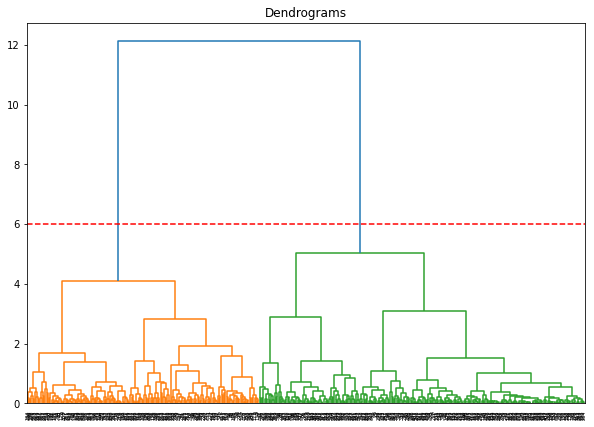

In [115]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [113]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

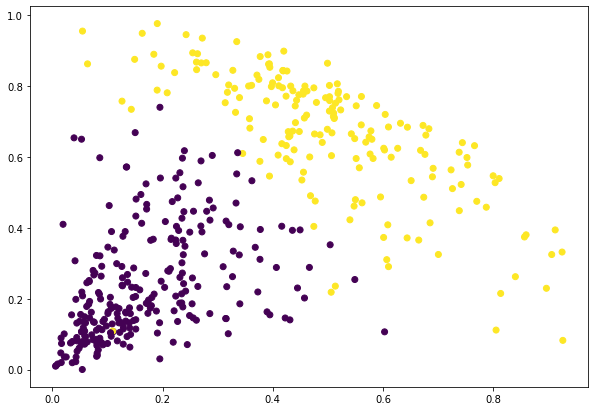

In [114]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_) 

**Another example**
The problem that we are going to solve in this section is to segment customers into different groups based on their shopping trends.

In [ ]:

customer_data = pd.read_csv('shopping_data.csv')  

In [ ]:
customer_data.shape  

In [ ]:
customer_data.head() 

Dataset has five columns: CustomerID, Genre, Age, Annual Income, and Spending Score. To view the results in two-dimensional feature space, we will retain only two of these five columns. We can remove CustomerID column, Genre, and Age column. We will retain the Annual Income (in thousands of dollars) and Spending Score (1-100) columns. The Spending Score column signifies how often a person spends money in a mall on a scale of 1 to 100 with 100 being the highest spender.

In [ ]:
data = customer_data.iloc[:, 3:5].values  

we need to know the clusters that we want our data to be split to

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward'))  

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data)

In [ ]:
#cluster.fit(X_train)

As a final step, let's plot the clusters to see how actually our data has been clustered:

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')
plt.xlabel('Annual Income')
plt.ylabel("Scoring")
#plt.grid()

You can see the data points in the form of five clusters. The data points in the bottom right belong to the customers with high salaries but low spending. These are the customers that spend their money carefully. Similarly, the customers at top right (green data points), these are the customers with high salaries and high spending. These are the type of customers that companies target. The customers in the middle (blue data points) are the ones with average income and average salaries. The highest numbers of customers belong to this category. Companies can also target these customers given the fact that they are in huge numbers, etc.

In [ ]:
data = customer_data.iloc[:, 2:5].values  

we need to know the clusters that we want our data to be split to

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward'))  

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data)

As a final step, let's plot the clusters to see how actually our data has been clustered:

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(data[:,0], data[:,2], c=cluster.labels_, cmap='rainbow')
plt.xlabel('Age')
plt.ylabel("Scoring")
#plt.grid()